<a href="https://colab.research.google.com/github/FranciscoAlveJr/Mercado-Filmes/blob/main/Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎥ANÁLISE DE FILMES🎬
Uma análise de filmes lançados no perído de 1980 à 2020. Fazendo um levantamento de quanto eles lucraram, quais filmes mais fizeram bilheteria, qual estúdio lucrou mais, qual diretor foi mais lucrativo, qual filme teve maior índice de ganho e qual ator é o mais rentável.

Os dados foram obtidos no site Kaggle, feito por Daniel Grijalva.

Link do Dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies

## Importando Bibliotecas

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import warnings
from plotly.offline import offline, iplot

warnings.filterwarnings('ignore')

pd.options.display.float_format = "{:,.1f}".format

## Acessando os dados do Dataset

In [4]:
df = pd.read_csv('movies.csv', encoding='latin-1')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score       votes         director  \
0  June 13, 1980 (United States)    8.4   927,000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65,000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7 1,200,000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221,000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108,000.0     Harold Ramis   

                    writer            star         country       budget  \
0             Stephen King  Jack Nicholson  United Kingdom 19,000,000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States  4,500,000.0   
2           Leigh Brackett     Mark Hamill   United States 18,000,000.0   
3             Jim Abrahams     Robert Hays   United States  3,500,000.0   
4       Brian Doyle-Murray     Chevy Chase   United States  6,000,000.0   

          gross             company  runtime  
0  46,998,772.0        Warner Bros.    146.0  
1  58,853,106.0   Columbia Pictures    104.0  
2 538,375,067.0           Lucasfilm    124.0  
3  83,453,539.0  Paramount Pictures     88.0  
4  39,846,344.0      Orion Pictures     98.0

In [5]:
df.shape

(7668, 15)

## Traduzindo os nomes das colunas

In [6]:
colunas = ['nome', 'classificação', 'gênero', 'ano', 'lançamento', 'nota', 'votos', 'diretor', 'roterista', 'estrela', 'país', 'orçamento', 'bilheteria', 'estúdio', 'duração']
df.columns = colunas
df.columns

Index(['nome', 'classificação', 'gênero', 'ano', 'lançamento', 'nota', 'votos',
       'diretor', 'roterista', 'estrela', 'país', 'orçamento', 'bilheteria',
       'estúdio', 'duração'],
      dtype='object')

In [7]:
df.head()

nome classificação     gênero  \
0                                     The Shining             R      Drama   
1                                 The Blue Lagoon             R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back            PG     Action   
3                                       Airplane!            PG     Comedy   
4                                      Caddyshack             R     Comedy   

    ano                     lançamento  nota       votos          diretor  \
0  1980  June 13, 1980 (United States)   8.4   927,000.0  Stanley Kubrick   
1  1980   July 2, 1980 (United States)   5.8    65,000.0   Randal Kleiser   
2  1980  June 20, 1980 (United States)   8.7 1,200,000.0   Irvin Kershner   
3  1980   July 2, 1980 (United States)   7.7   221,000.0     Jim Abrahams   
4  1980  July 25, 1980 (United States)   7.3   108,000.0     Harold Ramis   

                 roterista         estrela            país    orçamento  \
0             Stephen King  Jack Nicholson  United Kingdom 19,000,000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States  4,500,000.0   
2           Leigh Brackett     Mark Hamill   United States 18,000,000.0   
3             Jim Abrahams     Robert Hays   United States  3,500,000.0   
4       Brian Doyle-Murray     Chevy Chase   United States  6,000,000.0   

     bilheteria             estúdio  duração  
0  46,998,772.0        Warner Bros.    146.0  
1  58,853,106.0   Columbia Pictures    104.0  
2 538,375,067.0           Lucasfilm    124.0  
3  83,453,539.0  Paramount Pictures     88.0  
4  39,846,344.0      Orion Pictures     98.0

## Verificando Valores Nulos

In [8]:
df.isnull().sum()

nome                0
classificação      77
gênero              0
ano                 0
lançamento          2
nota                3
votos               3
diretor             0
roterista           3
estrela             1
país                3
orçamento        2171
bilheteria        189
estúdio            17
duração             4
dtype: int64

## Removendo Valores Nulos

In [9]:
df.dropna(inplace=True)

In [10]:
df.head(10)

nome classificação     gênero  \
0                                     The Shining             R      Drama   
1                                 The Blue Lagoon             R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back            PG     Action   
3                                       Airplane!            PG     Comedy   
4                                      Caddyshack             R     Comedy   
5                                 Friday the 13th             R     Horror   
6                              The Blues Brothers             R     Action   
7                                     Raging Bull             R  Biography   
8                                     Superman II            PG     Action   
9                                 The Long Riders             R  Biography   

    ano                         lançamento  nota       votos  \
0  1980      June 13, 1980 (United States)   8.4   927,000.0   
1  1980       July 2, 1980 (United States)   5.8    65,000.0   
2  1980      June 20, 1980 (United States)   8.7 1,200,000.0   
3  1980       July 2, 1980 (United States)   7.7   221,000.0   
4  1980      July 25, 1980 (United States)   7.3   108,000.0   
5  1980        May 9, 1980 (United States)   6.4   123,000.0   
6  1980      June 20, 1980 (United States)   7.9   188,000.0   
7  1980  December 19, 1980 (United States)   8.2   330,000.0   
8  1980      June 19, 1981 (United States)   6.8   101,000.0   
9  1980       May 16, 1980 (United States)   7.0    10,000.0   

              diretor                roterista          estrela  \
0     Stanley Kubrick             Stephen King   Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole   Brooke Shields   
2      Irvin Kershner           Leigh Brackett      Mark Hamill   
3        Jim Abrahams             Jim Abrahams      Robert Hays   
4        Harold Ramis       Brian Doyle-Murray      Chevy Chase   
5  Sean S. Cunningham            Victor Miller     Betsy Palmer   
6         John Landis              Dan Aykroyd     John Belushi   
7     Martin Scorsese             Jake LaMotta   Robert De Niro   
8      Richard Lester             Jerry Siegel     Gene Hackman   
9         Walter Hill              Bill Bryden  David Carradine   

             país    orçamento    bilheteria                       estúdio  \
0  United Kingdom 19,000,000.0  46,998,772.0                  Warner Bros.   
1   United States  4,500,000.0  58,853,106.0             Columbia Pictures   
2   United States 18,000,000.0 538,375,067.0                     Lucasfilm   
3   United States  3,500,000.0  83,453,539.0            Paramount Pictures   
4   United States  6,000,000.0  39,846,344.0                Orion Pictures   
5   United States    550,000.0  39,754,601.0            Paramount Pictures   
6   United States 27,000,000.0 115,229,890.0            Universal Pictures   
7   United States 18,000,000.0  23,402,427.0  Chartoff-Winkler Productions   
8   United States 54,000,000.0 108,185,706.0                Dovemead Films   
9   United States 10,000,000.0  15,795,189.0                United Artists   

   duração  
0    146.0  
1    104.0  
2    124.0  
3     88.0  
4     98.0  
5     95.0  
6    133.0  
7    129.0  
8    127.0  
9    100.0

In [11]:
df.describe(exclude=np.number)

nome classificação  gênero                       lançamento  \
count       5421          5421    5421                             5421   
unique      5336            10      15                             2560   
top     Hercules             R  Comedy  August 26, 2016 (United States)   
freq           3          2597    1496                                7   

            diretor    roterista       estrela           país  \
count          5421         5421          5421           5421   
unique         2063         3205          1845             50   
top     Woody Allen  Woody Allen  Nicolas Cage  United States   
freq             33           32            40           4319   

                   estúdio  
count                 5421  
unique                1475  
top     Universal Pictures  
freq                   330

In [12]:
fig = px.box(
    x = df["orçamento"],
    labels = {"x": "Orçamento"},
    title = "Detectando Outliers no Orçamento", template="plotly_dark"
)

fig.update_layout(
    title = {"font":{
        "size": 25,
        "family": "tahoma"
    }}
)

iplot(fig)

In [13]:
df['orçamento'].describe()

count         5,421.0
mean     36,009,170.5
std      41,573,374.0
min           6,000.0
25%      10,000,000.0
50%      21,800,000.0
75%      45,000,000.0
max     356,000,000.0
Name: orçamento, dtype: float64

In [14]:
media = f'{df["orçamento"].median():,.0f}'
print(media)

21,800,000


In [15]:
df['bilheteria'].head()

0    46,998,772.0
1    58,853,106.0
2   538,375,067.0
3    83,453,539.0
4    39,846,344.0
Name: bilheteria, dtype: float64

In [16]:
classificacao = df['classificação'].value_counts()
(classificacao/df.shape[0]*100).apply(lambda x: f'{x: 0.2f} %')

classificação
R             47.91 %
PG-13         31.89 %
PG            16.73 %
G              2.05 %
Not Rated      0.81 %
Unrated        0.31 %
NC-17          0.22 %
TV-MA          0.04 %
Approved       0.02 %
X              0.02 %
Name: count, dtype: object

In [17]:
cla = classificacao[0:6]
fig = px.bar(data_frame= cla, x=cla.index, y=cla/sum(cla)*100, color = cla.index,
             color_discrete_sequence=["#FF0060", "#45FFCA", "#45FFCA", "#293462",
                                      "#FF55BB", "#293462"],
             labels={'classificação': 'Classificação do Filme', 'y': 'Frequência(%)'},
             title='Popularidade das classificações dos filmes',
             text=cla.apply(lambda x: f'{x/sum(cla)*100:0.2f}%'),
             template='plotly_dark')

iplot(fig)

## Top 10 Maiores Bilheterias do Cinema

In [49]:
print('As 10 maiores bilheterias do cinema')
bil = df.sort_values(by='bilheteria', ascending=False, ignore_index=True)
top_bil = bil[['nome', 'bilheteria']]
top_bil.head(10)

As 10 maiores bilheterias do cinema


nome      bilheteria
0                                      Avatar 2,847,246,203.0
1                           Avengers: Endgame 2,797,501,328.0
2                                     Titanic 2,201,647,264.0
3  Star Wars: Episode VII - The Force Awakens 2,069,521,700.0
4                      Avengers: Infinity War 2,048,359,754.0
5                               The Lion King 1,670,727,580.0
6                              Jurassic World 1,670,516,444.0
7                                The Avengers 1,518,815,515.0
8                                   Furious 7 1,515,341,399.0
9                                   Frozen II 1,450,026,933.0

In [19]:
top_dez = bil.head(10)[::-1]
fig = px.bar(data_frame=top_dez,
             orientation='h',
             x = top_dez['bilheteria'],
             y = top_dez['nome'],
             color_discrete_sequence=['#45FFCA'],
             labels = {'nome': 'Filme', 'bilheteria': 'Bilheteria'},
             title = 'Top 10 Maiores Bilheterias da História',
             text = top_dez['bilheteria'],
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Filmes mais bem avaliados

In [47]:
print('Os 10 filmes mais bem avaliados'.title())
nota = df.sort_values(by='nota', ascending=False, ignore_index=True)
top_nota = nota[['nome', 'nota']]
top_nota.head(10)

Os 10 Filmes Mais Bem Avaliados


nome  nota
0                           The Shawshank Redemption   9.3
1                                    The Dark Knight   9.0
2                                   Schindler's List   8.9
3                                       Pulp Fiction   8.9
4      The Lord of the Rings: The Return of the King   8.9
5                                          Inception   8.8
6                                       Forrest Gump   8.8
7                                         Fight Club   8.8
8  The Lord of the Rings: The Fellowship of the Ring   8.8
9                                         The Matrix   8.7

In [21]:
top_dez = nota.head(10)[::-1]
fig = px.bar(data_frame=top_dez,
             orientation='h',
             x = top_dez['nota'],
             y = top_dez['nome'],
             color_discrete_sequence=['#45FFCA'],
             labels = {'y': 'Filmes', 'x': 'Nota'},
             title = 'Os 10 filmes mais bem avaliados'.title(),
             text = top_dez['nota'],
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Gêneros mais rentáveis

In [22]:
# Top 10 Gêneros mais rentáveis(Em Bilhões)
print('Top 10 Gêneros mais rentáveis(Em Bilhões)')
genero = df.groupby(by=['gênero']).sum().reset_index()
top_genero = genero[['gênero', 'bilheteria']].sort_values(by='bilheteria', ascending=False, ignore_index=True)
# top_genero['bilheteria'] = top_genero['bilheteria'].apply(lambda x: x/1000000000)
top_genero.head(10)

Top 10 Gêneros mais rentáveis(Em Bilhões)


gênero        bilheteria
0     Action 237,752,868,767.0
1     Comedy  88,514,817,620.0
2  Animation  77,865,909,110.0
3      Drama  52,098,564,769.0
4  Adventure  43,578,711,908.0
5      Crime  20,017,662,162.0
6  Biography  19,093,930,296.0
7     Horror  14,261,055,032.0
8     Family   2,074,332,587.0
9    Mystery   2,004,091,467.0

In [23]:
top_dez = top_genero.head(10)
fig = px.bar(data_frame=top_dez,
             x = top_dez['gênero'],
             y = top_dez['bilheteria'],
             color_discrete_sequence=['#45FFCA'],
             labels = {'y': 'Bilheteria', 'x': 'Gênero'},
             title = 'Top 10 Gêneros mais rentáveis (Em Bilhões).',
             text_auto = '.2s',
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Estrelas mais rentáveis

In [24]:
# Estrela mais rentável
estrelas = df.groupby(by=['estrela']).sum().reset_index()
top_estrelas = estrelas[['estrela', 'bilheteria']].sort_values(by='bilheteria', ascending=False, ignore_index=True)
# top_estrelas['bilheteria'] = top_estrelas['bilheteria'].apply(lambda x: x/1000000000)
top_estrelas.head(10)

estrela       bilheteria
0  Robert Downey Jr. 11,855,937,746.0
1          Tom Hanks  9,899,944,903.0
2         Tom Cruise  9,440,309,875.0
3         Will Smith  7,947,279,234.0
4        Johnny Depp  7,410,125,354.0
5   Daniel Radcliffe  6,971,268,037.0
6  Leonardo DiCaprio  6,963,367,648.0
7         Vin Diesel  6,036,312,568.0
8     Dwayne Johnson  5,711,270,624.0
9       Bruce Willis  5,318,951,036.0

In [25]:
top_dez = top_estrelas.head(10)
fig = px.bar(data_frame=top_dez,
             x = top_dez['estrela'],
             y = top_dez['bilheteria'],
             color_discrete_sequence=['#45FFCA'],
             labels = {'bilheteria': 'Bilheteria', 'estrela': 'Estrelas'},
             title = 'Top 10 Estrelas mais rentáveis (Em Bilhões).',
             text_auto = '.2s',
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Diretores mais rentáveis

In [26]:
# Diretores mais rentáveis
diretor = df.groupby(by=['diretor']).sum().reset_index()
top_diretor = diretor[['diretor', 'bilheteria']].sort_values(by='bilheteria', ascending=False, ignore_index=True)
# top_diretor['bilheteria'] = top_diretor['bilheteria'].apply(lambda x: x/1000000000)
top_diretor.head(10)

diretor      bilheteria
0   Steven Spielberg 9,629,049,370.0
1      Anthony Russo 6,844,248,984.0
2      Peter Jackson 6,618,045,788.0
3        Michael Bay 6,451,692,798.0
4      James Cameron 6,248,088,578.0
5  Christopher Nolan 5,153,547,948.0
6        David Yates 5,044,548,416.0
7        J.J. Abrams 4,659,375,464.0
8         Tim Burton 4,456,348,890.0
9         Ron Howard 4,388,092,562.0

In [27]:
top_dez = top_diretor.head(10)
fig = px.bar(data_frame=top_dez,
             x = top_dez['diretor'],
             y = top_dez['bilheteria'],
             color_discrete_sequence=['#45FFCA'],
             labels = {'bilheteria': 'Bilheteria', 'diretor': 'Diretor'},
             title = 'Top 10 Diretores mais rentáveis (Em Bilhões).',
             text_auto = '.2s',
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Atores com mais filmes

In [28]:
# Ator com mais filmes
estrela = df['estrela'].value_counts()
estrela.head(10)

estrela
Nicolas Cage          40
Tom Hanks             38
Robert De Niro        38
Bruce Willis          34
Tom Cruise            33
Denzel Washington     33
Sylvester Stallone    32
Johnny Depp           31
Adam Sandler          28
Eddie Murphy          27
Name: count, dtype: int64

In [29]:
top_dez = estrela.nlargest(10)
fig = px.bar(data_frame=top_dez,
             x = top_dez.index,
             y = top_dez,
             color_discrete_sequence=['#45FFCA'],
             labels = {'estrela': 'Ator', 'y': 'Nº de Filmes'},
             title = 'Top 10 Atores com mais filmes.',
             text_auto = True,
             template = 'plotly_dark'
             )


iplot(fig)

## Top 10 Estúdios com mais bilheteria

In [30]:
estudio = df.groupby('estúdio')['bilheteria'].sum().sort_values(ascending=False)
# top_estudio = estudio[['estúdio', 'bilheteria']].sort_values(by='bilheteria', ascending=False, ignore_index=True)
estudio = estudio.head(10)
pd.DataFrame(estudio)

bilheteria
estúdio                               
Warner Bros.          54,610,959,970.0
Universal Pictures    51,241,105,418.0
Columbia Pictures     42,356,430,218.0
Paramount Pictures    40,021,704,691.0
Twentieth Century Fox 39,542,573,303.0
Walt Disney Pictures  35,833,650,748.0
New Line Cinema       19,612,851,164.0
Marvel Studios        15,065,592,411.0
DreamWorks Animation  11,873,612,858.0
Dreamworks Pictures   11,593,807,697.0

In [31]:
top_dez = estudio[::-1]
fig = px.bar(
    data_frame = top_dez,
    orientation = 'h',
    y = top_dez.index,
    x = top_dez,
    color = top_dez,

    labels = {'x': 'Bilheteria', 'estúdio': 'Estúdio'},
    title = 'Top 10 Estúdios que mais arrecadaram',
    text_auto = '.2s',
    template = 'plotly_dark',
    color_continuous_scale = ['#00FFAB', '#00FFAB', '#A084E8']
)

iplot(fig)

## Relação Bilheteria x Orçamento

In [32]:
fig = px.scatter(
    df,
    x = 'orçamento',
    y = 'bilheteria',
    trendline = 'ols',
    template = 'plotly_dark',
    color = 'bilheteria',
    color_discrete_sequence = ['#45FFCA'],
    title = 'Relação Bilheteria e Orçamento',
    labels = {'bilheteria': 'Bilheteria', 'orçamento': 'Orçamento', 'nome': 'Filme'},
    hover_name = 'nome',
    hover_data = ['bilheteria', 'orçamento']
    )

iplot(fig)


## Top 10 Filmes com maior índice de lucro

In [33]:
df['% lucro'] = (df['bilheteria'] / df['orçamento']) * 100
pontos_porcent = df[['nome', 'bilheteria', 'orçamento', '% lucro']].sort_values(by='% lucro', ascending=False, ignore_index=True)
pontos_porcent.head(10)

nome    bilheteria  orçamento     % lucro
0      Paranormal Activity 193,355,800.0   15,000.0 1,289,038.7
1  The Blair Witch Project 248,639,099.0   60,000.0   414,398.5
2              The Gallows  42,964,410.0  100,000.0    42,964.4
3              El Mariachi   2,040,920.0    7,000.0    29,156.0
4                     Once  20,936,722.0  150,000.0    13,957.8
5                   Clerks   3,151,130.0   27,000.0    11,670.9
6        Napoleon Dynamite  46,138,887.0  400,000.0    11,534.7
7    In the Company of Men   2,804,473.0   25,000.0    11,217.9
8              Keeping Mum  18,586,834.0  169,000.0    10,998.1
9               Open Water  54,683,487.0  500,000.0    10,936.7

In [34]:
top_dez = pontos_porcent.head(10)[::-1]
fig = px.bar(
    data_frame = top_dez,
    orientation = 'h',
    y = 'nome',
    x = '% lucro',
    color = '% lucro',

    labels = {'nome': 'Filme', '% lucro': 'Margem de Lucro (%)'},
    title = 'Top 10 Filmes mais rentáveis',
    text_auto = '.2s',
    template = 'plotly_dark',
    color_continuous_scale = ['#00FFAB', '#00FFAB', '#A084E8']
)

iplot(fig)

# CONCLUSÃO

## E O OSCAR 🎥🏆 DE ATOR COM MAIS FILMES VAI PARA...

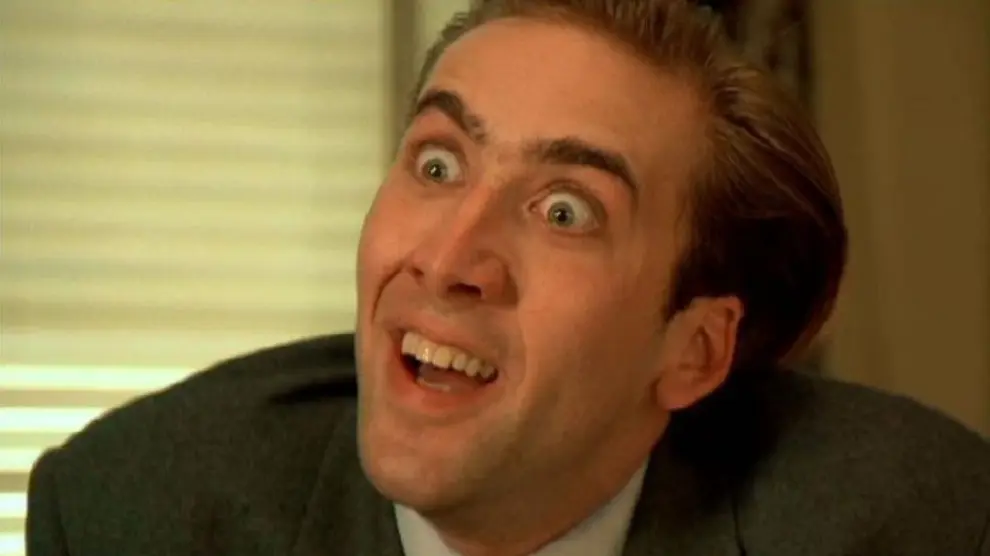

In [35]:
import requests as rq
from PIL import Image
from io import BytesIO

url = 'https://imagenes.20minutos.es/files/image_990_556/uploads/imagenes/2023/11/06/uno-de-los-memes-mas-populares-de-nicolas-cage.jpeg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Com 40 filmes no currículo, Nicolas Cage é o ator que mais protagonizou filmes.

## E O OSCAR 🎥 🏆 DE FILME MAIS BEM AVALIADO VAI PARA...

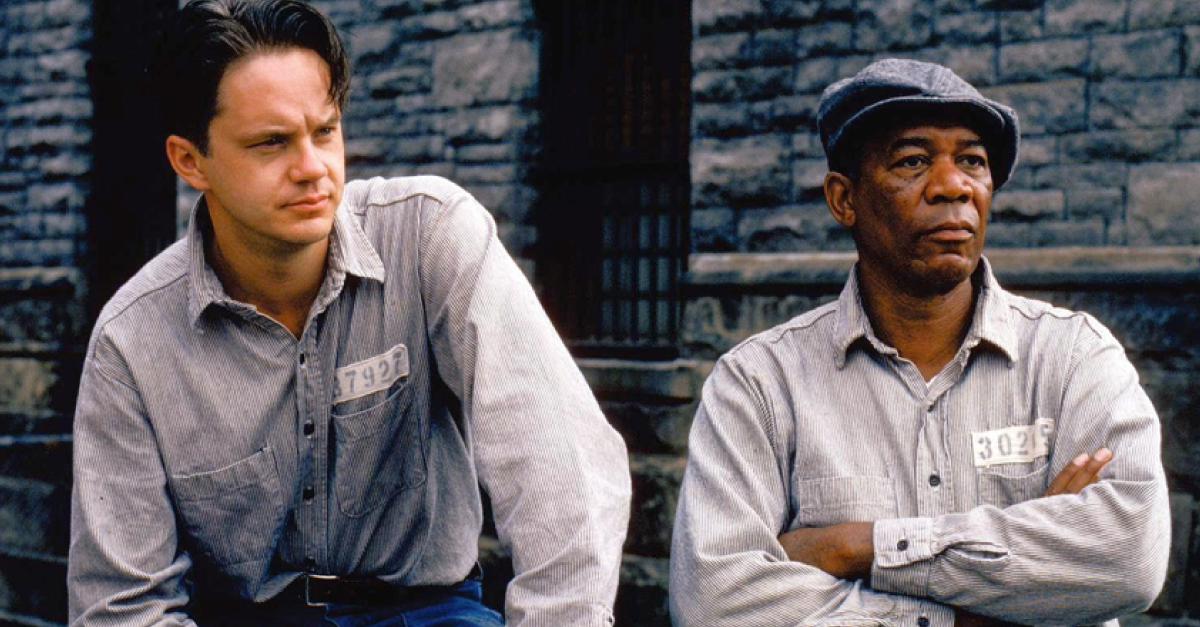

In [36]:
url = 'https://blog.fortestecnologia.com.br/wp-content/uploads/2019/02/fortes-tecnologia-um-sonho-de-liberdade.png'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

The Shawshank Redemption, ou "Um Sonho de Liberdade", no português, tem a nota mais alta da história, com 9,3 nas avaliações dos usuários no imdb.

## E O GÊNERO MAIS RENTÁVEL FOI...

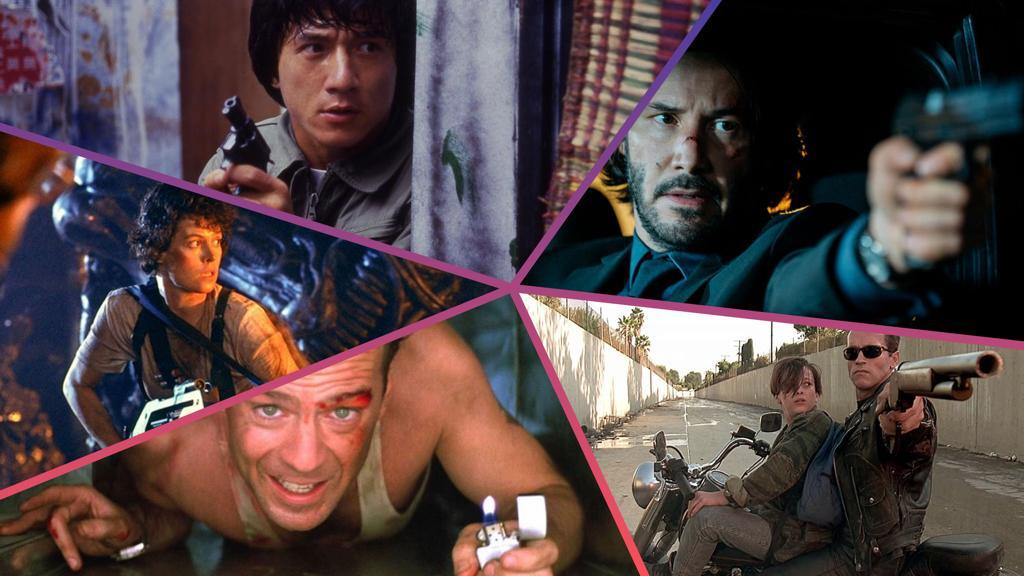

In [37]:
url = 'https://manualdohomemmoderno.com.br/files/2021/06/30-filmes-de-acao-que-voce-precisa-ver-antes-de-morrer-30-filmes-de-acao-que-voce-precisa-ver-antes-de-morrer.jpeg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Os filmes do gênero de AÇÃO fizeram ao todo mais de 237 bilhões de dólares, sendo a principal aposta dos estúdios quando se quer lucrar na indústria.

## E O OSCAR 🎬 🏆 DE DIRETOR MAIS RENTÁVEL DA HISTÓRIA VAI PARA...

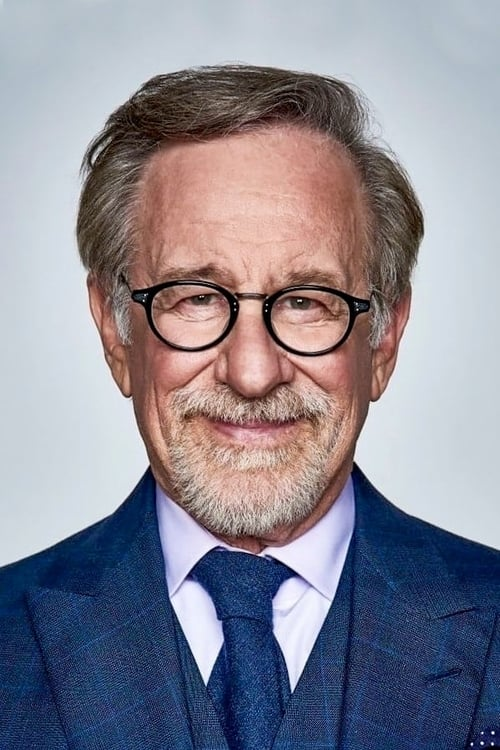

In [38]:
url = 'https://media.themoviedb.org/t/p/w500/tZxcg19YQ3e8fJ0pOs7hjlnmmr6.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Steven Spielberg, somou mais de 9.6 bilhões de dólares com seus filmes, tornando-se o Diretor mais rentável da história.

## E O OSCAR 🎥🏆 DE FILME MAIS RENTÁVEL VAI PARA...

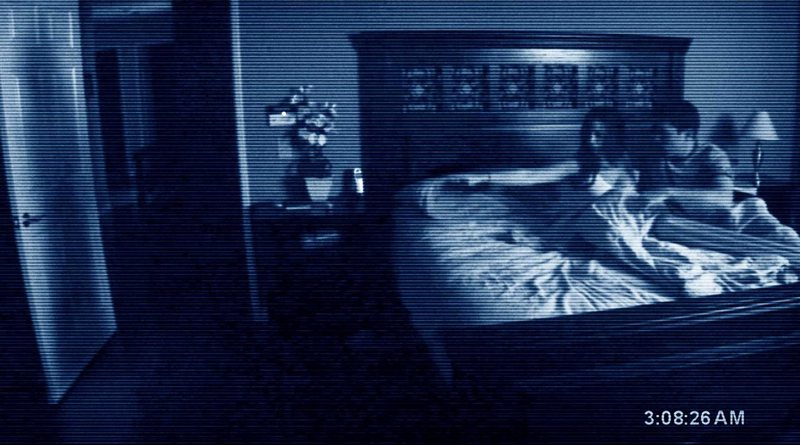

In [39]:
url = 'https://bocadoinferno.com.br/wp-content/uploads/2022/04/Atividade-Paranormal-2007-2.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Atividade Paranormal foi um fenômeno do gênero de Terror. Lançado em 2007, o filme contou com um orçamento de apenas 15 mil dólares, arrecadando mais de 193 milhôes em bilheteria. Tendo uma incrível marca de 1.289.038,7% de lucro.

## E O ESTÚDIO COM MAIOR BILHETERIA FOI...

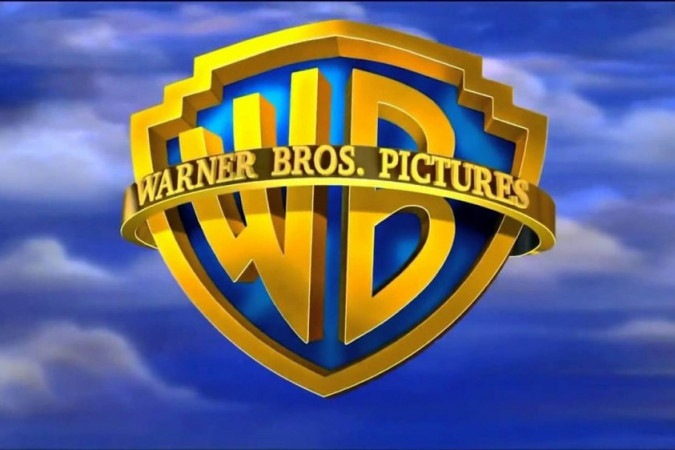

In [40]:
url = 'https://midias.correiobraziliense.com.br/_midias/jpg/2021/01/13/675x450/1_warner-6481070.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

A WARNER BROS., somando as bilheterias de seus filmes, arrecadou mais de 54 bilhões de bilheteria, tornando-se o estúdio de cinema que mais lucrou na história.

## E O OSCAR 🎥🏆 DE ATOR MAIS RENTÁVEL VAI PARA...

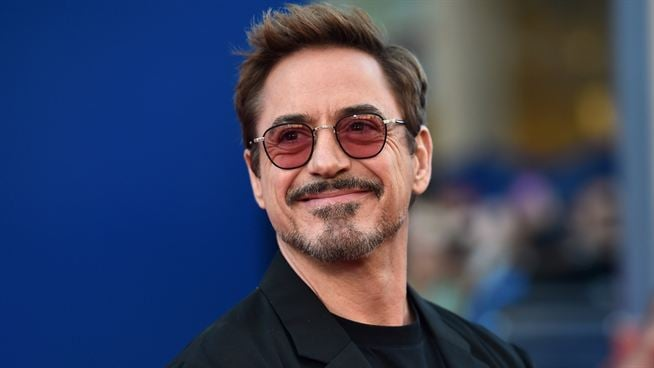

In [41]:
url = 'https://br.web.img2.acsta.net/r_654_368/newsv7/19/05/31/23/09/1563908.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Robert Downey Jr, mais famoso por seu papel como Tony Stark nos filmes da MARVEL, fez uma soma de quase 12 bilhões de dólares em bilheteria nos filmes que protagonizou. Muito devido ao sucesso de seu personagem na MARVEL, com a franquia Vingadores, cuja bilheteria foi a segunda maior da história, não conseguindo superar o maior fenômeno das bilheterias...

## E O OSCAR 🎥🏆 DE MAIOR BILHETERIA VAI PARA...

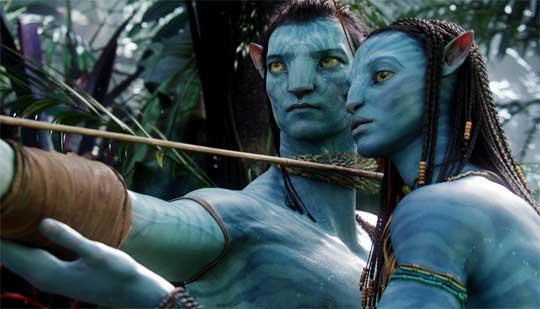

In [42]:
url = 'https://www.infoescola.com/wp-content/uploads/2010/02/avatar.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Avatar, lançado em 2009, o fenômeno dirigido por James Cameron, faturou mais de 2,8 bilhões de dólares na bilheteria em todo o mundo, tornando-se a maior bilheteria de todos os tempos.

In [43]:
!pandas --version

/bin/bash: line 1: pandas: command not found
